# Python: Intro to machine learning

### Ahmed Hasan, borrowing heavily from Nil Sahin
### UofT Coders, 2023/03/15

## Intro

"Machine learning gives computers the ability to learn without being explicitly programmed." - Arthur Samuel, 1959

Machine learning (ML) originated from pattern recognition and computational learning theory in AI. It is the study and construction of algorithms to learn from and make predictions on data through building a model from sample input.

At its core, ML is grounded in statistics. That said, in statistics, we are typically choosing either or both of **inference** and **prediction** when approaching a problem. We might want our chosen model to tell us something about the relationship between features of interest, such as how much sales volume has increased given some increase in a marketing budget, and thus **infer** something about said features.

Machine learning is mostly concerned with the **prediction** side of things, where we use relationships between variables to estimate the output for any arbitrary input. At many levels of ML, we are not as interested in understanding these relationships, and instead tend to treat the models as 'black boxes' -- especially as models increase in complexity. Our models therefore deal with the data as needed, but we're not as interested in peeking 'under the hood' for the purposes of learning more about the relationships within our data. 

## Some uses of ML algorithms

- Classification: determine which discrete category the example is
- Recognizing patterns: speech recognition, facial identity...
- Recommender Systems: noisy data, commercial pay-off (e.g., Amazon, Netflix)
- Information retrieval: find documents or images with similar content
- Computer vision: detection, segmentation, depth estimation, optical flow...
- Robotics: perception, planning ...
- Learning to play games: AlphaGO
- Recognizing anomalies: Unusual sequences of credit card transactions, panic situation at an airport
- Spam filtering, fraud detection: The enemy adapts so we must adapt too
- Large language models: GPT, LLaMA, PaLM...

## Some risks to worry about

- GIGO
    - Garbage in, garbage out - if the data your model is trained on are 'garbage', your model will make equally made predictions (e.g. if you have a model showing a correlation between divorce rates and Honda sales, guess what it'll keep predicting)
- Biased training data
    - If you have an email spam predictor trained on a dataset that only has 1% spam examples, it's going to assume most emails are not spam
- Overfitting
    - Models can be too tightly tied to their data depending on how we fit them, making them not generalizable enough to new data (e.g. a model trying to predict Toronto's next mayor that's just trained on the last four years will likely tell you it'll be John Tory again) 
- Lack of explainability
    - The 'black box'-ness of ML models can make their outputs hard to understand or explain
- Extrapolation is not always appropriate
    - Depends on your model! 

Still, ML used well and carefully is an incredibly powerful tool, and is already heavily integrated in the world around us.


## Types of learning tasks

- Supervised Learning: correct output known for each training example for predicting output when given an input vector
    - Classification: 1-of-N output, e.g. object recognition, medical diagnosis
    - Regression: real-valued-output, e.g.predicting market prices, customer ratings
- Unsupervised Learning: for learning an internal representation of the input to capture regularities and structure in the data without any labels
    - Clustering: dividing input into groups that are unknown beforehand
    - Dimensionality reduction: extract informative features, e.g. PCA
- Reinforcement Learning: perform an action with the goal to maximize payoff by the feedback of reward and punishments, e.g. playing a game against an opponent

In this lesson, we'll cover:

- Regression (e.g. Linear Regression)
- Simple cross-validation
- Clustering (e.g. K-means)

We won't cover:

- Classification (e.g. logistic regression)
- Other classification and clustering algorithms (e.g. Neural Networks, Hierarchical Clustering)
- Model selection (such as Bayesian Information Criteria - BIC)
- Hyper-parameter selection
- Dimensionality Reduction (e.g. PCA)
- Anything else further down the AI world - there have been many developments in the last six months alone! 

We will assume:

- A working knowledge of basic Python
- Familiarity with the `matplotlib` and (especially) the `pandas` libraries
- Some understanding of intro level undergrad statistics

## The `iris` dataset

- 150 rows with measurements of petal length, petal width, sepal length, and sepal width, split evenly across 3 species
- Included in `sklearn`, the package we'll be using! 

## Linear regression with sklearn

Linear regression might not be the most exciting thing, and is also not likely to be the first method many people think of when they think about ML. Concepts like 'neural networks' and 'generative AI' might sound very exciting, but it can be hard to get a solid understanding of ML fundamentals if we're to start there, and so they're outside the scope of this lesson. Still, linear models can be surprisingly useful even for fairly complicated-seeming problems, and (more importantly for us) the simplicity of linear regression makes it a useful means of exploring some foundational ML concepts. 

Let's introduce `sklearn` by fitting a linear model to the relationship between petal length (predictor) and petal width (response). From a statistical perspective, we might be interested in the relationship between these two, but in this case we will be fitting this model solely for the purposes of predicting petal width for any given petal length values.

In [1]:
from sklearn import linear_model # for linear regression functions
from sklearn.datasets import load_iris # the iris dataset

import numpy as np # for general data handling
import pandas as pd # for data frames
import matplotlib # for plotting
import matplotlib.pyplot as plt

In [2]:
iris_raw = load_iris() # not yet a data frame
iris = pd.DataFrame(
    data=np.c_[iris_raw.data, iris_raw['target']])
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
# prepping our data for linear regression - need to reshape for sklearn
n = iris.shape[0] # number of rows (150)
x = iris.petal_length.values.reshape(n, 1)
y = iris.petal_width.values.reshape(n, 1)

# fit model
lm = linear_model.LinearRegression()
lm.fit(x, y) # fit y against x
lm.coef_ # get coefficient - for that stats itch

array([[0.41575542]])

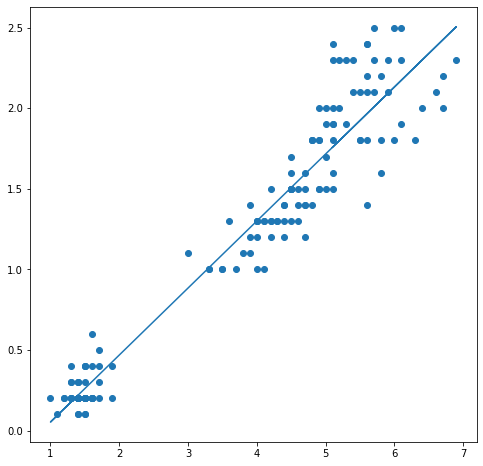

In [4]:
# visualizing our fit
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y)
ax.plot(x, lm.predict(x))

To evaluate our model, we will calculate the **mean squared error** (MSE) and **R^2 scores**. MSE is reflective of the residuals (distance between each point and its prediction on the line) and lower values suggest a better model. R^2, on the other hand, contrasts the residuals with the overall distance (of all points) from the mean y value. While R^2 is probably easier to interpret, MSE is still useful mathematically speaking, as it's often the value we are trying to minimize. There exist many more advanced metrics (RMSE, adjusted R^2, etc.) that cover for some of the imperfections these two have and/or make them more appropriate for testing specific models, but their base versions are still a very useful starting point and important to understand. 

In [5]:
# evaluating our model
from sklearn.metrics import r2_score, mean_squared_error

print(mean_squared_error(y, lm.predict(x)))
print(r2_score(y, lm.predict(x)))

0.04206730919499318
0.9271098389904927


### Train/test splits - the validation set approach

Look at that, a 0.93 R^2! This model must be amazing at predictions, right?

Not so fast - this is us 'testing' on the very same data the model was trained on! We're fortunate that our data corresponds well to a linear fit, but this is not a good estimate of how well it generalizes to new data. For that, we need to evaluate it with 'known' values that the model has never seen before. Models may have great training set accuracy but be _terrible_ on new test data! 

One means of evaluating this is called the _validation set approach_, where we withhold a subset of the data from the model fit. We retain a (usually larger) subset of the data for training, and then test the model's predictions on the hold-out set. 

Since we have known expected outputs for the hold-out set (e.g. if we're predicting petal width based on petal length, we have both for these data points) we can compare our model predictions with these 'ground truth' values to assess our model's accuracy.

[[0.38182003]]


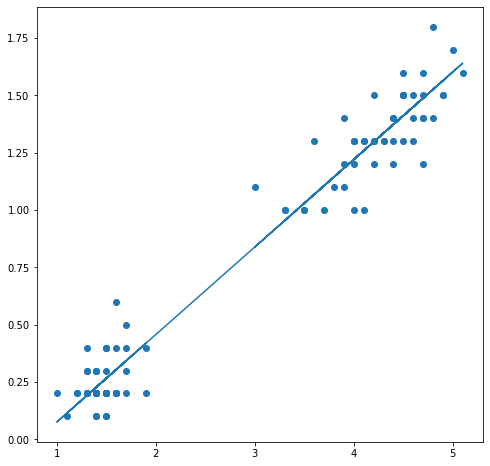

In [6]:
# let's withhold 50 observations for the test set, and use the remaining 50 for training the model:

iris_train = iris.iloc[:-50] # exclude last 50 rows
iris_test = iris.iloc[-50:] # only keep last 50 rows

# get training x and y data
train_x = iris_train.petal_length.values.reshape(iris_train.shape[0], 1)
train_y = iris_train.petal_width.values.reshape(iris_train.shape[0], 1)

# get test x and y data
test_x = iris_test.petal_length.values.reshape(iris_test.shape[0], 1)
test_y = iris_test.petal_width.values.reshape(iris_test.shape[0], 1)

# fit model with training data
lm = linear_model.LinearRegression() 
lm.fit(train_x, train_y)
print(lm.coef_)

# we can also plot what's going on here
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(train_x, train_y)
ax.plot(train_x, lm.predict(train_x))

In [7]:
# testing the model on the test data
pred_y = lm.predict(test_x)

# comparing predicted y values against actual y values
print(mean_squared_error(test_y, pred_y))
print(r2_score(test_y, pred_y))

0.1260677797201568
-0.7053701060569884


## K-fold cross-validation

Another approach to validating our model performance that goes a step beyond validation set is _K-fold cross validation_. This is very similar to the approach above, but instead of us using a single hold-out set (which in the example above is a bit biased too, since the last few rows are all from one out of the three species!) we instead repeat the train/test split K times, with the different chunk of the data used as the hold-out set each time. K-fold allows for more data points to have the opportunity to be in both the train and test sets at some point. 

We'll do 5-fold CV below. The choice of K is a bit arbitrary, but a good starting point is to pick values where the dataset is nicely divisible by K, and 1/K of the dataset corresponds to a reasonable subsection (i.e. not like, half the dataset, nor a very tiny fraction). 

Fortunately, we don't need to do the train/test splitting K times ourselves - `sklearn` provides some functions to simplify this for us. The `KFold` function won't do the actual model fitting, but it'll return indices corresponding to train/test splits. That way, we can just re-fit the model each time in a loop. 

In [8]:
from sklearn.model_selection import KFold

k = 5
k_splits = KFold(n_splits=k, random_state=None) # think of random_state like a seed value in R
lm = linear_model.LinearRegression()

# we'll store our metrics in lists
mse_values = []
r2_values = []

for train_idx, test_idx in k_splits.split(iris.petal_length):
    # training data
    n = len(train_idx)
    train_x = iris.iloc[train_idx].petal_length.values.reshape(n, 1)
    train_y = iris.iloc[train_idx].petal_width.values.reshape(n, 1)
    
    # test data
    n_test = len(test_idx)
    test_x = iris.iloc[test_idx].petal_length.values.reshape(n_test, 1)
    test_y = iris.iloc[test_idx].petal_width.values.reshape(n_test, 1)
    
    lm.fit(train_x, train_y)
    pred_y = lm.predict(test_x)
    mse_values.append(mean_squared_error(test_y, pred_y))
    r2_values.append(r2_score(test_y, pred_y))
    
print(mse_values)
print(sum(mse_values) / k)
print(r2_values)
print(sum(r2_values) / k)


[0.010950502617330904, 0.01435887741431815, 0.02917583830584813, 0.06226445107434637, 0.10967123374012987]
0.04528418063039469
[-0.1148701759726034, 0.9526300734104822, 0.38011674987574795, 0.6875668712817142, -0.45925651043933957]
0.28923740163120026


## K-means clustering

We will wrap up by switching gears to clustering. So far, with regression, we've been looking at a _supervised_ approach, where our expected output is pre-defined (petal width values in our case). Clustering, on the other hand, is an example of an _unsupervised_ approach, in that we are using it to learn more about our data (in this case, the structure of it) without necessarily telling the algorithm what the expected output is. 

Let's see what kind of structure k-means finds within the petal width by petal length data. We'll leave the species labels out - this is an unsupervised algorithm after all! 

In [9]:
from sklearn.cluster import KMeans

# kmeans expects data as numpy arrays in the form [[x1, y1], [x2, y2], ..., [xn, yn]]
iris_petal_paired = np.c_[iris.petal_length, iris.petal_width]

# we'll give it 3 clusters to begin with
n_clusters = 3
kmeans = KMeans(n_clusters)
kmeans.fit(iris_petal_paired)
clusters = kmeans.predict(iris_petal_paired) # predicted cluster centers

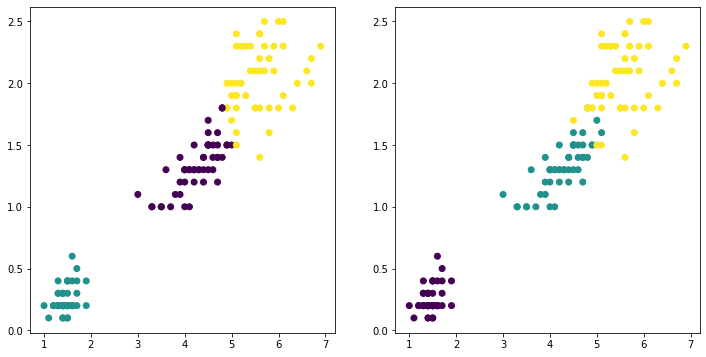

In [10]:
# plotting the data - we'll do clusters, and then shade by species out of curiosity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(iris_petal_paired[:, 0], iris_petal_paired[:, 1], c=clusters)
ax2.scatter(iris_petal_paired[:, 0], iris_petal_paired[:, 1], c=iris.species)

# Further reading

- N
- `sklearn` class and function reference page http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
- Machine Learning course from Computer Science Department, UofT http://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/CSC411_Fall16.html 
- TPOT for optimized machine learning pipelines https://rhiever.github.io/tpot/
- KERAS package for Neural Networks https://keras.io/